In [1]:
from IPython.display import IFrame, YouTubeVideo

# Supervised Learning 

(supervised_async)=
## To do before...

{ref}`💻 [Async] <delivery_modes>`

### Background

Here is a taster for supervised learning to make you want more, which we'll do on the live session. To prepare for this part of the course (which includes the {ref}`section below <supervised_sync>`, as well as the one on [inference](08-Inference) and [overfitting/CV](09-Overfitting_cv)), here are two tasks you will need to complete *before* the live session:

*First*, watch the following clip which sets up the scene for what will be to come

```{sidebar} Slides

The slides used in the clip are available at:

- <a href="../slides/07-Supervised_learning.html"> `[HTML]` </a>
- <a href="../slides/07-Supervised_learning.pdf"> `[PDF]` </a>

```

In [2]:
IFrame("https://liverpool.instructuremedia.com/embed/7f8c65b9-310f-4f98-a223-8a912b57400d",
       width=500,
       height=300
      )

*Second*, read the following two articles, all mentioned in the clip:

```{margin}
An open access, PDF version is available [here](https://projecteuclid.org/euclid.ss/1009213726)
```
- *Statistical Modeling: the Two Cultures* ({cite}`breiman2001statistical`)
```{margin}
An open access, PDF version is available [here](https://www.aeaweb.org/articles?id=10.1257/jep.31.2.87)
```
- *Machine Learning*: An Applied Econometric Approach* ({cite}`mullainathan2017machine`)

## Regression trees

Most of this block relies on linear regression. Linear regression is one of the simplest but also most powerful supervised algorithms. Later in the section, we will contrast its use with another technique that has gained much popularity since its inception at the turn of the millenium: random forests. A detailed understanding of random forests goes beyond the scope of this course. However, its intuition will be useful and will be covered here. 

To understand random forests, we first need to learn about regression trees:

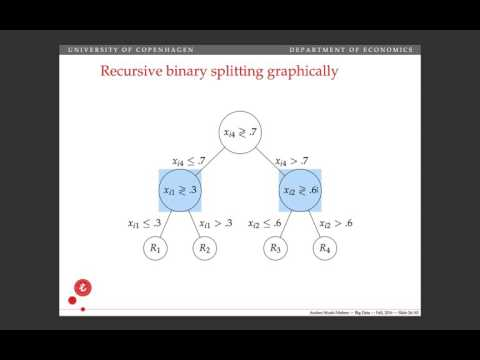

In [3]:
YouTubeVideo("w4MnOA14pYs", width=700)

A forest is no more than a collection of trees. A random forest thus will "grow" several trees, and then aggregate the predictions of each into a single, better prediction. This is what we call "bagging":

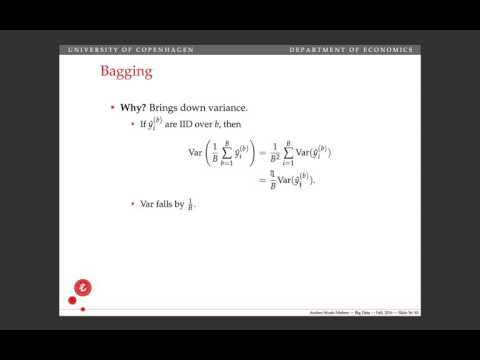

In [4]:
YouTubeVideo("KySpjLT92dM", width=700)

Building on these two ideas, the notion of a "random" forest makes a bit more sense:

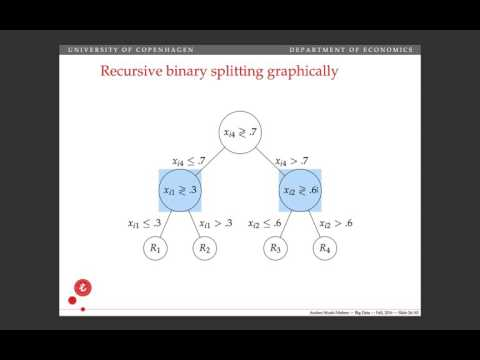

In [3]:
YouTubeVideo("kp8hbqQax0U", width=700)

(supervised_sync)=
## Action!

{ref}`👨‍🏫 [Sync] <delivery_modes>`

In [3]:
%matplotlib inline
from IPython.display import Image

import pandas
import numpy as np

````{tabbed} Local files

Assuming you have [the file](https://github.com/darribas/data_science_studio/raw/master/content/data/paris_abb.csv.zip) downloaded on the path `../data/`: 

```python
db = pandas.read_csv("../data/paris_abb.csv.zip")
```
````

````{tabbed} Online read

If you're online, you can do:

```python
db = pandas.read_csv("https://github.com/darribas/data_science_studio/raw/master/content/data/paris_abb.csv.zip")
```
````

In [2]:
db = pandas.read_csv("../data/paris_abb.csv.zip")

### Linear Regression

$$
P_i = \alpha + \beta X + \epsilon
$$

#### The Econometrician way

In [4]:
import statsmodels.formula.api as sm

- Raw price

In [5]:
f = "Price ~ bathrooms + bedrooms + room_type"
lm_raw = sm.ols(f, db)\
       .fit()
lm_raw

In [6]:
lm_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1151.
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:24:33   Log-Likelihood:            -3.2312e+05
No. Observations:               50280   AIC:                         6.462e+05
Df Residuals:                   50274   BIC:                         6.463e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    69.3589      1.295     53.573      0.000      66.821      71.896
room_type[T.Hotel room]     148.7074      4.779     31.120      0.000     139.341     158.073
room_type[T.Private room]   -51.5793      2.202    -23.425      0.000     -55.895     -47.264
room_type[T.Shared room]    -71.5010      8.692     -8.226      0.000     -88.537     -54.465
bathrooms                    -2.4081      1.367     -1.762      0.078      -5.087       0.271
bedrooms                     43.3410      0.939     46.174      0.000      41.501      45.181
==============================================================================
Omnibus:                   135133.909   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6632879884.203
Skew:                          32.680   Prob(JB):                         0.00
Kurtosis:                    1781.140   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, $Price$ is rather skewed:

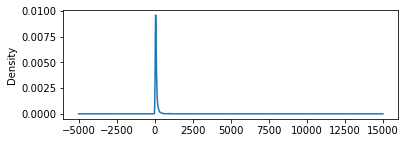

In [7]:
db.Price.plot.kde(figsize=(6, 2));

We could take the log to try to obtain a better fit:

In [8]:
f = "np.log1p(Price) ~ bathrooms + bedrooms + room_type"
lm_log = sm.ols(f, db)\
       .fit()
lm_log

In [9]:
lm_log.rsquared

0.31515872008420753

In [10]:
lm_raw.rsquared

0.10269412705703151

---

That ☝️ is _inference_ though. We're here to "machine learn"!

In [11]:
# Get predictions
yp_raw = lm_raw.fittedvalues
yp_raw.head()

0     66.950833
1     66.950833
2    153.632865
3    110.291849
4    110.291849
dtype: float64

Or...

In [12]:
lm_raw.predict(db[["bathrooms", 
                   "bedrooms",
                   "room_type"
                  ]])\
      .head()

0     66.950833
1     66.950833
2    153.632865
3    110.291849
4    110.291849
dtype: float64

#### The Machine Learner way

We need to:

- Get the dummies ourselves first

In [13]:
room_type_ds = pandas.get_dummies(db["room_type"])
room_type_ds.head(2)

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0


- Prep `X` and `y`

In [14]:
X = pandas.concat([db[["bathrooms", "bedrooms"]],
                   room_type_ds.drop("Entire home/apt",
                                     axis=1)
                  ], axis=1
                 )
X.head()

,bathrooms,bedrooms,Hotel room,Private room,Shared room
0,1.0,0.0,0,0,0
1,1.0,0.0,0,0,0
2,1.0,2.0,0,0,0
3,1.0,1.0,0,0,0
4,1.0,1.0,0,0,0


- Set up a model

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

- Train the model (see the use of `fit`)

In [16]:
regressor.fit(X, db["Price"])

LinearRegression()

And voila, we have our results!

In [17]:
pandas.Series(regressor.coef_,
              index=X.columns
             )

bathrooms        -2.408064
bedrooms         43.341016
Hotel room      148.707387
Private room    -51.579347
Shared room     -71.501010
dtype: float64

In [18]:
regressor.intercept_

69.35889717336228

In [19]:
lm_raw.params

Intercept                     69.358897
room_type[T.Hotel room]      148.707387
room_type[T.Private room]    -51.579347
room_type[T.Shared room]     -71.501010
bathrooms                     -2.408064
bedrooms                      43.341016
dtype: float64

### Tree-based approaches: the Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

Very similar API (as throughout `sklearn`). Two parameters to set (see [here](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters) for guidance):

In [21]:
rf_raw = RandomForestRegressor(n_estimators=100,
                               max_features=None
                              )

%time rf_raw.fit(X, db["Price"])

CPU times: user 750 ms, sys: 0 ns, total: 750 ms
Wall time: 749 ms


RandomForestRegressor(max_features=None)

To recover the predictions, we need to rely on `predict`:

In [22]:
rf_raw_lbls = rf_raw.predict(X)
rf_raw_lbls

array([ 71.98778067,  71.98778067, 140.74061093, ...,  93.62649936,
        71.98778067,  93.62649936])

For completeness, let's quickly fit a Random Forest on the log of price:

In [23]:
rf_log = RandomForestRegressor(n_estimators=100,
                               max_features=None
                              )

%time rf_log.fit(X, np.log1p(db["Price"]))

rf_log_lbls = rf_log.predict(X)

CPU times: user 590 ms, sys: 0 ns, total: 590 ms
Wall time: 589 ms


---

**EXERCISE** 

- Train a random forest on the price using the number of beds and the property type instead

---

Before we move on, let's record all the predictions in a single table for convenience:

In [24]:
res = pandas.DataFrame({"LM-Raw": lm_raw.fittedvalues,
                        "LM-Log": lm_log.fittedvalues,
                        "RF-Raw": rf_raw_lbls,
                        "RF-Log": rf_log_lbls,
                        "Truth": db["Price"]
                       })
res.head()

,LM-Raw,LM-Log,RF-Raw,RF-Log,Truth
0,66.950833,4.198030,71.987781,4.181397,60.0
1,66.950833,4.198030,71.987781,4.181397,115.0
2,153.632865,4.850742,140.740611,4.817468,119.0
3,110.291849,4.524386,93.626499,4.444683,130.0
4,110.291849,4.524386,93.626499,4.444683,75.0


And write it out to a file:

In [25]:
res.to_parquet("../data/lm_results.parquet")

### An example with categorical outcomes

Let's bring back the classification we did in the previous session:

In [26]:
k5_pca = pandas.read_parquet("../data/k5_pca.parquet")\
               .reindex(db.index)
k5_pca.head()

,k5_pca
0,2
1,1
2,0
3,2
4,2


Now we might conceive cases where we want to build a model to predict these classes based on some house characteristics. To illustrate it, let's consider the same variables as above. In this case, however, we want a _classifier_ rather than a _regressor_, as the response is categorical.

In [27]:
from sklearn.ensemble import RandomForestClassifier

But the training is very similar:

In [28]:
%%time

classifier = RandomForestClassifier(n_estimators=100,
                                    max_features="sqrt"
                                   )
classifier.fit(X, k5_pca["k5_pca"])

pred_lbls = pandas.Series(classifier.predict(X),
                          index=k5_pca.index
                         )

CPU times: user 1.23 s, sys: 0 ns, total: 1.23 s
Wall time: 1.23 s


In [29]:
class_res = pandas.DataFrame({"Truth": k5_pca["k5_pca"],
                              "Predicted": pred_lbls
                             }
                            ).apply(pandas.Categorical)
class_res.describe()

,Truth,Predicted
count,50280,50280
unique,5,5
top,2,2
freq,22773,49801
